# Data of Global Indicators – Gapminder

This is a recreation of the Gapminder visuals by James Compagno for GSB 544: Data Science and Machine Learning with Python. 
Data may be found at [Gapminder](https://www.gapminder.org/).

---
format: html
execute:
  echo: true
---

In [123]:
import statsmodels.api as sm
import pandas as pd
import plotnine as p9


df1 = pd.read_csv("Data/q1data.csv")
df2 = pd.read_csv("Data/q2data.csv")
df3 = pd.read_csv("Data/q3data.csv")

In [124]:
df1

,income,life_exp,population,year,country,four_regions,six_regions,eight_regions,world_bank_region
0,1910.0,61.0,29200000.0,2010,Afghanistan,asia,south_asia,asia_west,South Asia
1,11100.0,78.1,2950000.0,2010,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
2,11100.0,74.7,36000000.0,2010,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
3,46900.0,81.9,84500.0,2010,Andorra,europe,europe_central_asia,europe_west,Europe & Central Asia
4,7680.0,60.8,23400000.0,2010,Angola,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa
...,...,...,...,...,...,...,...,...,...
192,20400.0,75.4,28400000.0,2010,Venezuela,americas,america,america_south,Latin America & Caribbean
193,5350.0,73.3,88000000.0,2010,Vietnam,asia,east_asia_pacific,east_asia_pacific,East Asia & Pacific
194,4700.0,67.8,23200000.0,2010,Yemen,asia,middle_east_north_africa,asia_west,Middle East & North Africa
195,3200.0,57.5,13600000.0,2010,Zambia,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa


## Task 1

Below is a plot of a visualization in Gapminder (the default/starting one actually). Look it over and take note of the variables being visualized.

1. Identify, and list here, what aesthetics are being used and which variables are being mapped to each aesthetic.
    
    -Asetics/Variables
        x = Income 
        y = life expactancy 
        color = four_regions
        This graph is measuring the effect of income on life expectncy and highlighting differences by dividing the world into 4 regions. 
    -Geometry
        Bubble Chart

2. Import the q1data.csv dataset.

3. Recreate the plot as best you can using plotnine.

In [125]:
#Type Check
df1.dtypes

income               float64
life_exp             float64
population           float64
year                   int64
country               object
four_regions          object
six_regions           object
eight_regions         object
world_bank_region     object
dtype: object

In [126]:
#Data Clean
df1 = df1.dropna(subset=["four_regions"])

/Users/jamescompagno/Library/Python/3.9/lib/python/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 2 rows containing missing values.


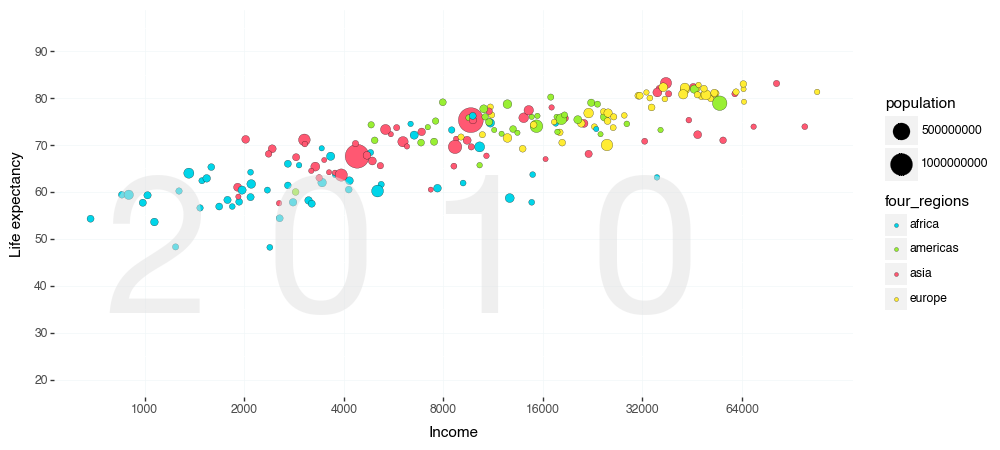

In [127]:
#Task 1 Graph Here
(p9.ggplot(df1,
p9.aes(
  x = "income",
  y = "life_exp",
  fill = "four_regions",
  size = "population"
))
+ p9.geom_point(shape='o', color='black', stroke=0.1, alpha=1) + p9.scale_size(range=(2, 10))
    + p9.labs(
        x="Income", y="Life expectancy") 
      + p9.annotate("text", x=6000, y=45, label="2 0 1 0", family= "Helvetica Neue", alpha=0.5, size=140, color="#e1e1e1")
      + p9.scale_x_log10(breaks=[500,1000,2000,4000,8000,16000,32000,64000])
      + p9.scale_y_continuous(limits=(20, 95), breaks=range(10, 100, 10))
      + p9.theme(figure_size=(10, 4.5))
      + p9.scale_fill_manual( values={"africa":"#00d5e9", "americas":"#99ef33",
            "asia":"#ff5872", "europe":"#ffec33"}, limits=["africa","americas","asia","europe"])
      + p9.theme(panel_background=p9.element_rect(fill="white"), panel_grid_major=p9.element_line(color="#f2f7f8", size=0.5))

    )

4. What other geometries could you use here besides geom_point? Provide an actual plot of another geometry being used here and why it’s good or bad for visualizing these data.

You can use a violin plot to highlight the variation in the continemnts more. 

/Users/jamescompagno/Library/Python/3.9/lib/python/site-packages/plotnine/positions/position.py:232: PlotnineWarning: position_dodge requires non-overlapping x intervals


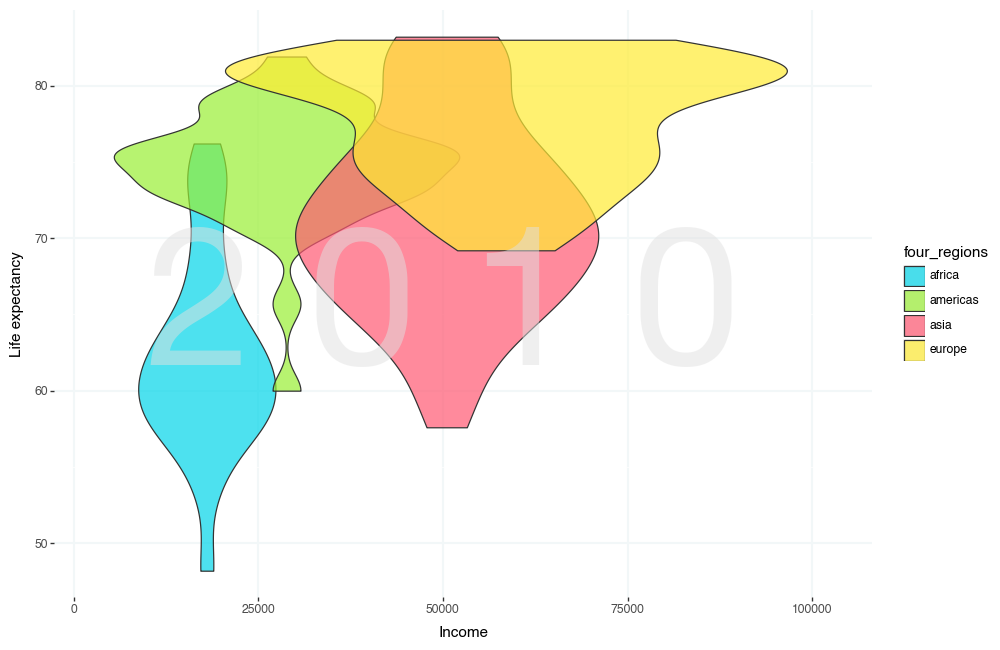

In [128]:
#Task 1 Alternative Version
(p9.ggplot(df1,
p9.aes(
  x = "income",
  y = "life_exp",
  fill = "four_regions",
  size = "population"
))
+ p9.geom_violin(alpha=.7) 
 + p9.labs(
        x="Income", y="Life expectancy")
      + p9.theme(figure_size=(10, 6.5))
      + p9.scale_fill_manual( values={"africa":"#00d5e9", "americas":"#99ef33",
            "asia":"#ff5872", "europe":"#ffec33"}, limits=["africa","americas","asia","europe"])
      + p9.theme(panel_background=p9.element_rect(fill="white"), panel_grid_major=p9.element_line(color="#f2f7f8", size=1.5))
      + p9.annotate("text", x=50000, y=65, label="2 0 1 0", family= "Helvetica Neue", alpha=0.5, size=140, color="#e1e1e1")
    )


## Task 2


Below is another plot of a visualization in Gapminder. Look it over and take note of the variables being visualized.

In [129]:
df2

,imports,exports,energy,year,country,four_regions,six_regions,eight_regions,world_bank_region
0,NaN,NaN,NaN,1997,Afghanistan,asia,south_asia,asia_west,South Asia
1,36.7,11.5,427.0,1997,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
2,22.5,22.6,825.0,1997,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
3,NaN,NaN,NaN,1997,American Samoa,NaN,NaN,NaN,NaN
4,NaN,NaN,434.0,1997,Angola,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa
...,...,...,...,...,...,...,...,...,...
201,52.2,44.8,340.0,1997,Vietnam,asia,east_asia_pacific,east_asia_pacific,East Asia & Pacific
202,NaN,NaN,NaN,1997,Virgin Islands (U.S.),NaN,NaN,NaN,NaN
203,NaN,NaN,241.0,1997,Yemen,NaN,NaN,NaN,NaN
204,31.6,24.6,617.0,1997,Zambia,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa


1. Identify, and list here, what aesthetics are being used and which variables are being mapped to each aesthetic.

    -Asetics/Variables
        x = Exports as a percentage of GDP
        y = Imports as a percentage of GDP
        fill = The four_regions
        size = Energy consumption per person
        This graph is measuring the interaction between exports and imports on a country (if both increase or decrease simultaneously).
    -Geometry
        Bubble Chart


2. Import the q2data.csv dataset.

3. Recreate the plot as best you can using plotnine.

In [130]:
#Data Clean
df2 = df2.dropna(subset=["imports","exports","energy","four_regions"], how='any')

In [131]:
#Type Check
df2.dtypes

imports              float64
exports              float64
energy               float64
year                   int64
country               object
four_regions          object
six_regions           object
eight_regions         object
world_bank_region     object
dtype: object

In [132]:
#type clean
df2["energy"] = df2["energy"].astype(float)

<positron-console-cell-132>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


/Users/jamescompagno/Library/Python/3.9/lib/python/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 33 rows containing missing values.


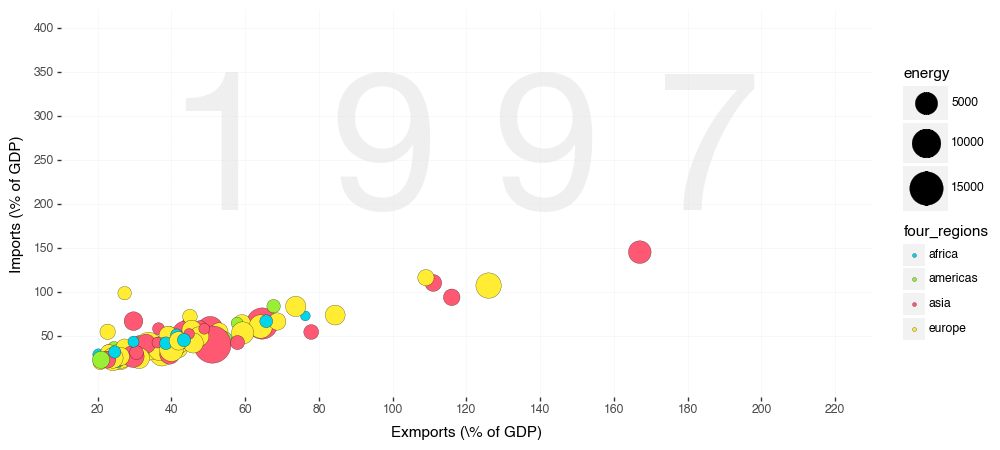

In [133]:
#Task 2 Graph Here
(p9.ggplot(df2,
p9.aes(
  x = "exports",
  y = "imports",
  fill = "four_regions",
  size = "energy"
))
+ p9.geom_point(shape='o', color='black', stroke=0.1, alpha=1) 
    + p9.scale_size(range=(3, 15))
    + p9.labs(x="Exmports (\% of GDP)", y="Imports (\% of GDP)") 
      + p9.theme(figure_size=(10, 4.5))
      + p9.scale_x_continuous(limits=(20, 220),breaks=[20,40,60,80,100,120,140,160,180, 200, 220])
      + p9.scale_y_continuous(limits=(0, 400),breaks=[50,100,150,200,250,300,350,400])
      + p9.scale_fill_manual( values={"africa":"#00d5e9", "americas":"#99ef33",
            "asia":"#ff5872", "europe":"#ffec33"}, limits=["africa","americas","asia","europe"])
      + p9.theme(panel_background=p9.element_rect(fill="white"), panel_grid_major=p9.element_line(color="#f2f7f8", size=0.5))
      + p9.annotate("text", x=120, y=250, label="1 9 9 7", family= "Helvetica Neue", alpha=0.5, size=140, color="#e1e1e1")
    )

4. What other geometries could you use here besides geom_point? Provide an actual plot of another geometry being used here and why it’s good or bad for visualizing these data.

/Users/jamescompagno/Library/Python/3.9/lib/python/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_boxplot : Removed 35 rows containing non-finite values.


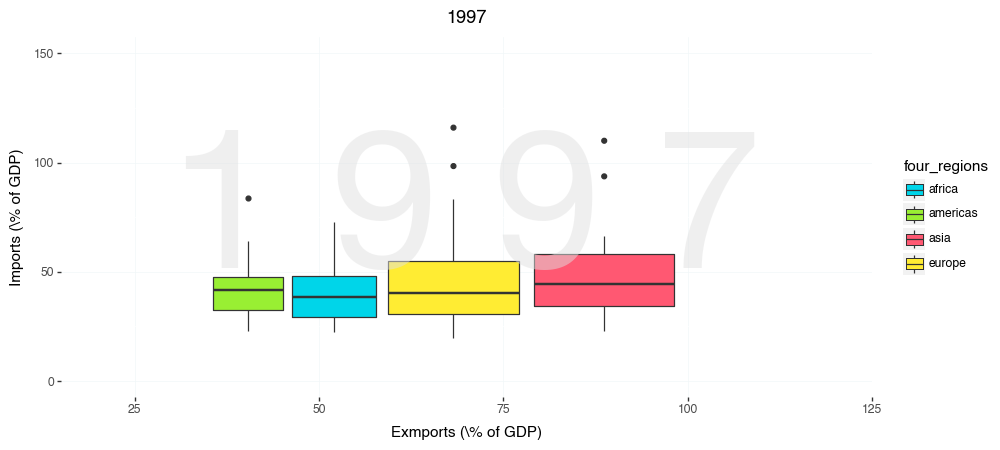

In [134]:
#Task 2 Graph Here
(p9.ggplot(df2,
p9.aes(
  x = "exports",
  y = "imports",
  fill = "four_regions",
  size = "energy"
))
+ p9.geom_boxplot() 
    + p9.labs(
        title="1997",
        x="Exmports (\% of GDP)", y="Imports (\% of GDP)") 
      + p9.theme(figure_size=(10, 4.5))
      + p9.scale_x_continuous(limits=(20, 120))
      + p9.scale_y_continuous(limits=(0, 150))
      + p9.scale_fill_manual( values={"africa":"#00d5e9", "americas":"#99ef33",
            "asia":"#ff5872", "europe":"#ffec33"}, limits=["africa","americas","asia","europe"])
      + p9.theme(panel_background=p9.element_rect(fill="white"), panel_grid_major=p9.element_line(color="#f2f7f8", size=0.5))
      + p9.annotate("text", x=70, y=75, label="1 9 9 7", family= "Helvetica Neue", alpha=0.5, size=140, color="#e1e1e1")
    )

## Task 3


Below is a final plot of a visualization in Gapminder. Look it over and take note of the variables being visualized.

In [135]:
df3

,internet_users,gdp,income,year,country,four_regions,six_regions,eight_regions,world_bank_region
0,0.00456,330.0,1190.0,2001,Afghanistan,asia,south_asia,asia_west,South Asia
1,0.39000,2570.0,6780.0,2001,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
2,1.59000,3770.0,9230.0,2001,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
3,NaN,10500.0,NaN,2001,American Samoa,NaN,NaN,NaN,NaN
4,11.30000,42600.0,35600.0,2001,Andorra,europe,europe_central_asia,europe_west,Europe & Central Asia
...,...,...,...,...,...,...,...,...,...
210,1.85000,847.0,3270.0,2001,Vietnam,asia,east_asia_pacific,east_asia_pacific,East Asia & Pacific
211,27.50000,36700.0,NaN,2001,Virgin Islands (U.S.),NaN,NaN,NaN,NaN
212,0.51900,1190.0,4940.0,2001,Yemen,asia,middle_east_north_africa,asia_west,Middle East & North Africa
213,0.47800,991.0,2080.0,2001,Zambia,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa


1. Identify, and list here, what aesthetics are being used and which variables are being mapped to each aesthetic.
-Asetics/Variables
        x = "internet_users",
        y = "gdp",
        fill = "four_regions",
        size = "income"
        This graph is measuring the interaction between internet users and GDP on a country (if both increase or decrease simultaneously). With income as a highlighting effect. 
    -Geometry
        Bubble Chart

2. Import the q3data.csv dataset.

3. Recreate the plot as best you can using plotnine.

In [136]:
#Data Clean
df3 = df3.dropna(subset=["four_regions"], how='any')

/Users/jamescompagno/Library/Python/3.9/lib/python/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 12 rows containing missing values.


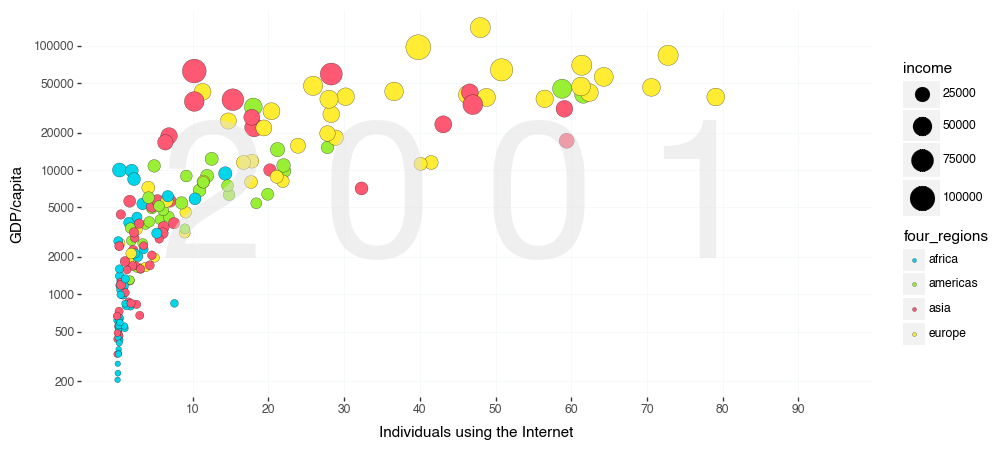

In [137]:
#Task 3 Graph Here
(p9.ggplot(df3,
p9.aes(
  x = "internet_users",
  y = "gdp",
  fill = "four_regions",
  size = "income"
))
+ p9.geom_point(shape='o', color='black', stroke=0.1, alpha=1) + p9.scale_size(range=(2, 10))
    + p9.labs(x="Individuals using the Internet", y="GDP/capita") 
      + p9.scale_x_continuous(limits=(0, 95), breaks=range(10, 100, 10))
      + p9.scale_y_log10(breaks=[200,500,1000,2000,5000,10000,20000,50000,100000])
      + p9.theme(figure_size=(10, 4.5))
      + p9.scale_fill_manual( values={"africa":"#00d5e9", "americas":"#99ef33",
            "asia":"#ff5872", "europe":"#ffec33"}, limits=["africa","americas","asia","europe"])
      + p9.theme(panel_background=p9.element_rect(fill="white"), panel_grid_major=p9.element_line(color="#f2f7f8", size=0.5))
      + p9.annotate("text", x=45, y=5000, label="2 0 0 1", family= "Helvetica Neue", alpha=0.5, size=140, color="#e1e1e1")
    )

4. What other geometries could you use here besides geom_point? Provide an actual plot of another geometry being used here and why it’s good or bad for visualizing these data.

/Users/jamescompagno/Library/Python/3.9/lib/python/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_ydensity : Removed 12 rows containing non-finite values.
/Users/jamescompagno/Library/Python/3.9/lib/python/site-packages/plotnine/positions/position.py:232: PlotnineWarning: position_dodge requires non-overlapping x intervals


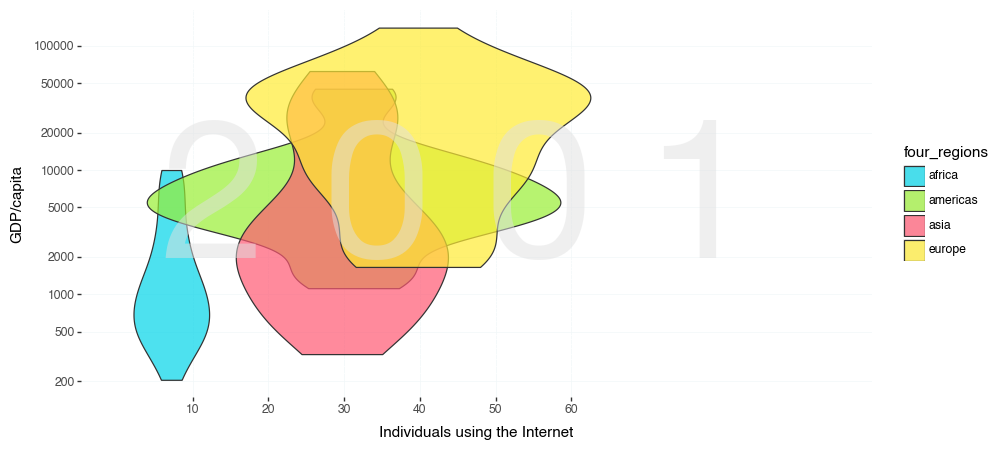

In [138]:
#Task 3 Alternative Graph Here
(p9.ggplot(df3,
p9.aes(
  x = "internet_users",
  y = "gdp",
  fill = "four_regions",
  size = "income"
))
+ p9.geom_violin(alpha=.7) 
    + p9.labs(x="Individuals using the Internet", y="GDP/capita") 
      + p9.theme(figure_size=(10, 4.5))
      + p9.scale_x_continuous(limits=(0, 95), breaks=range(10, 70, 10))
      + p9.scale_y_log10(breaks=[200,500,1000,2000,5000,10000,20000,50000,100000,200000])
      + p9.scale_fill_manual( values={"africa":"#00d5e9", "americas":"#99ef33",
            "asia":"#ff5872", "europe":"#ffec33"}, limits=["africa","americas","asia","europe"])
      + p9.theme(panel_background=p9.element_rect(fill="white"), panel_grid_major=p9.element_line(color="#f2f7f8", size=0.5))
      + p9.annotate("text", x=45, y=5000, label="2 0 0 1", family= "Helvetica Neue", alpha=0.5, size=140, color="#e1e1e1")
    )